# Inicialização

In [2]:
# Carregando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Carregando os dados 

In [3]:
# Carregando os dados de df_hypotheses 

df_hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')

In [4]:
# Carregando os dados de df_orders
df_orders = pd.read_csv(
    'orders_us.csv',
    parse_dates=['date'])

In [5]:
# Carregando os dados de df_visits 
df_visits = pd.read_csv(
    'visits_us.csv',
    parse_dates=['date'])

# Preparando os dados

# df_hypotheses

In [6]:
# Corrigindo as colunas de df_hypotheses 
df_hypotheses.columns = df_hypotheses.columns.str.lower() # Convertendo para minúsculas

In [7]:
print(df_hypotheses.columns) # Exibindo o nome das colunas 

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


### df_orders

In [8]:
# Corrigindo as colunas de df_orders 
df_orders.columns = df_orders.columns.str.lower() # Convertendo para minúsculas

In [9]:
# Alterando nome das colunas / Changing column names
df_orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}, inplace=True)

In [10]:
# Observando os dados para ver se existem valores nulos e se o tipo de dado está correto 
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [11]:
# Visualizando os dados 
df_orders.tail(10)

,transaction_id,visitor_id,date,revenue,group
1187,2274188238,132143192,2019-08-14,15.5,A
1188,1692103379,1022829655,2019-08-14,5.7,A
1189,4082620617,393266494,2019-08-14,490.4,B
1190,38478481,1197745035,2019-08-14,135.3,B
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


### df_visits

In [12]:
# Observando os dados para ver se existem valores nulos e se o tipo de dado está correto
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
# Visualizando os dados 
df_visits.tail(10)

,date,group,visits
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


# Parte 1. Priorizando Hipóteses 


In [14]:
# Aplicar o framework ICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
df_hypotheses['ice'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort'] 
df_hypotheses_sorted_ice = df_hypotheses[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)
df_hypotheses_sorted_ice # exibindo os resultados de 'ice'

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


In [15]:
# Aplicar o framework RICE para priorizar hipóteses. Classifique-os em ordem decrescente de prioridade.
df_hypotheses['rice'] = (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']
df_hypotheses_sorted_rice = df_hypotheses[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)
df_hypotheses_sorted_rice # exibindo os resultados de 'rice'

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [16]:
# Abaixo irei criar o top 3 hipóteses de 'ice'  e 'rice' e observar quais são as hipóteses mais promissoras
top_3_ice = df_hypotheses_sorted_ice.head(3)
top_3_ice

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000


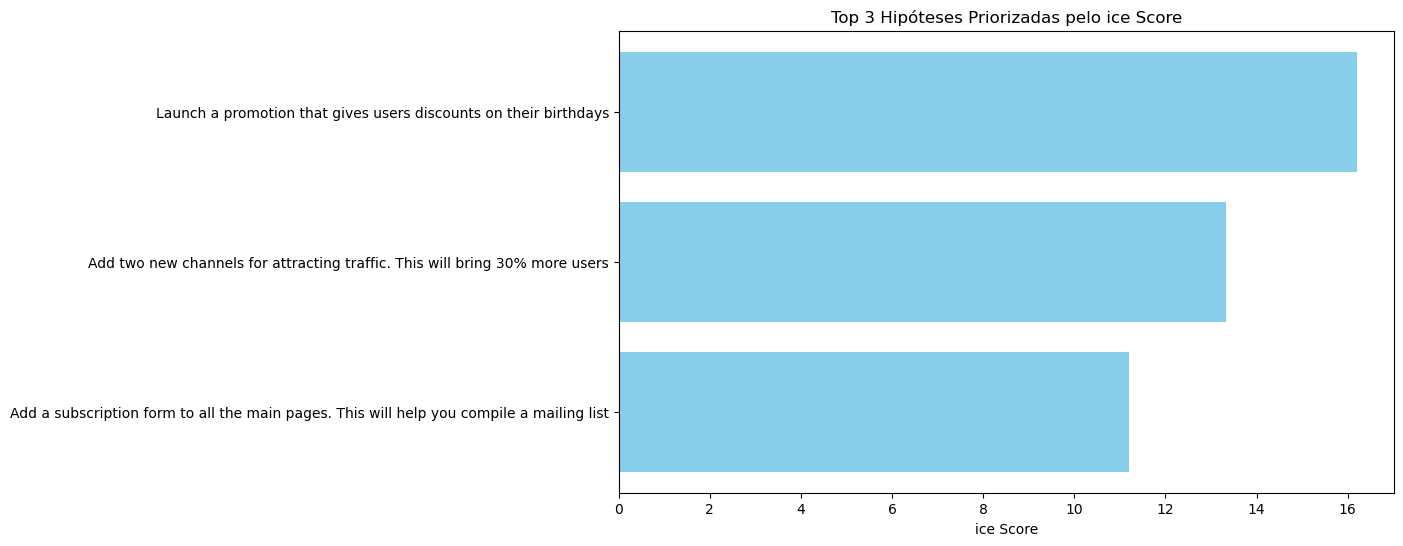

In [17]:
# Exibindo o gráfico do top 3 de ice
plt.figure(figsize=(10, 6))
plt.barh(top_3_ice['hypothesis'], top_3_ice['ice'], color='skyblue')
plt.xlabel('ice Score')
plt.title('Top 3 Hipóteses Priorizadas pelo ice Score')
plt.gca().invert_yaxis()  # Inverter a ordem para ter a hipótese mais importante no topo
plt.show()

In [18]:
# Exibindo o bottom 3 de ice
bottom_3_ice = df_hypotheses_sorted_ice.tail(3)
bottom_3_ice

,hypothesis,ice
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


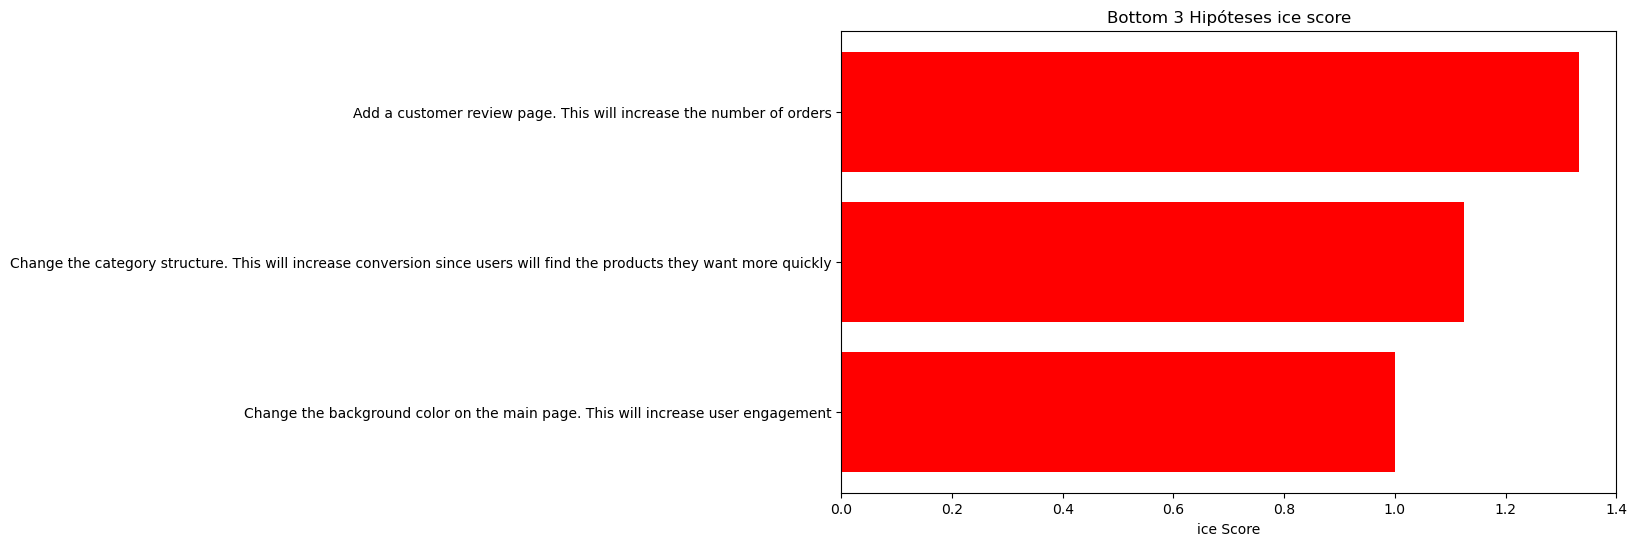

In [19]:
# Exibindo o gráfico de bottom 3 de ice
plt.figure(figsize=(10, 6))
plt.barh(bottom_3_ice['hypothesis'], bottom_3_ice['ice'], color='red')
plt.xlabel('ice Score')
plt.title('Bottom 3 Hipóteses ice score')
plt.gca().invert_yaxis()
plt.show()

In [20]:
# Exibindo o top 3 de rice
top_3_rice = df_hypotheses_sorted_rice.head(3)
top_3_rice

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0


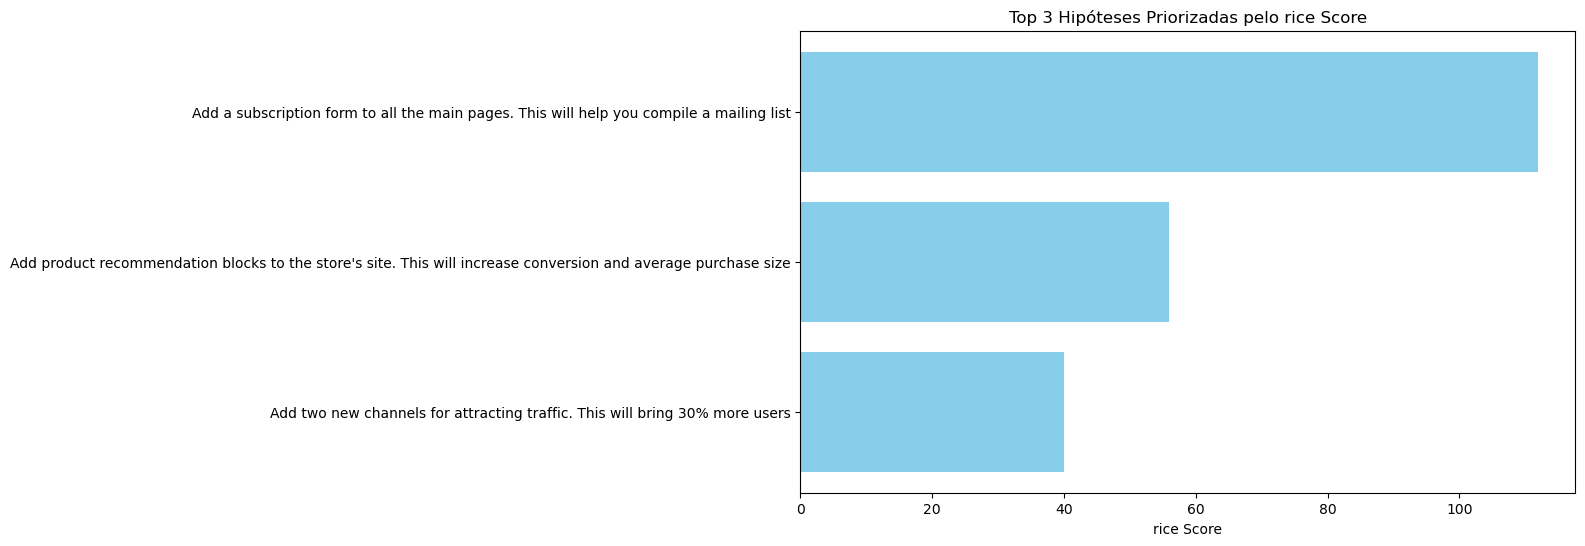

In [21]:
# Exibindo o gráfico de top 3 rice
plt.figure(figsize=(10, 6))
plt.barh(top_3_rice['hypothesis'], top_3_rice['rice'], color='skyblue')
plt.xlabel('rice Score')
plt.title('Top 3 Hipóteses Priorizadas pelo rice Score')
plt.gca().invert_yaxis()  # Inverte a ordem para ter a hipótese mais importante no topo
plt.show()

In [22]:
# Exibindo o bottom 3 de rice
bottom_3_rice = df_hypotheses_sorted_rice.tail(3)
bottom_3_rice

,hypothesis,rice
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


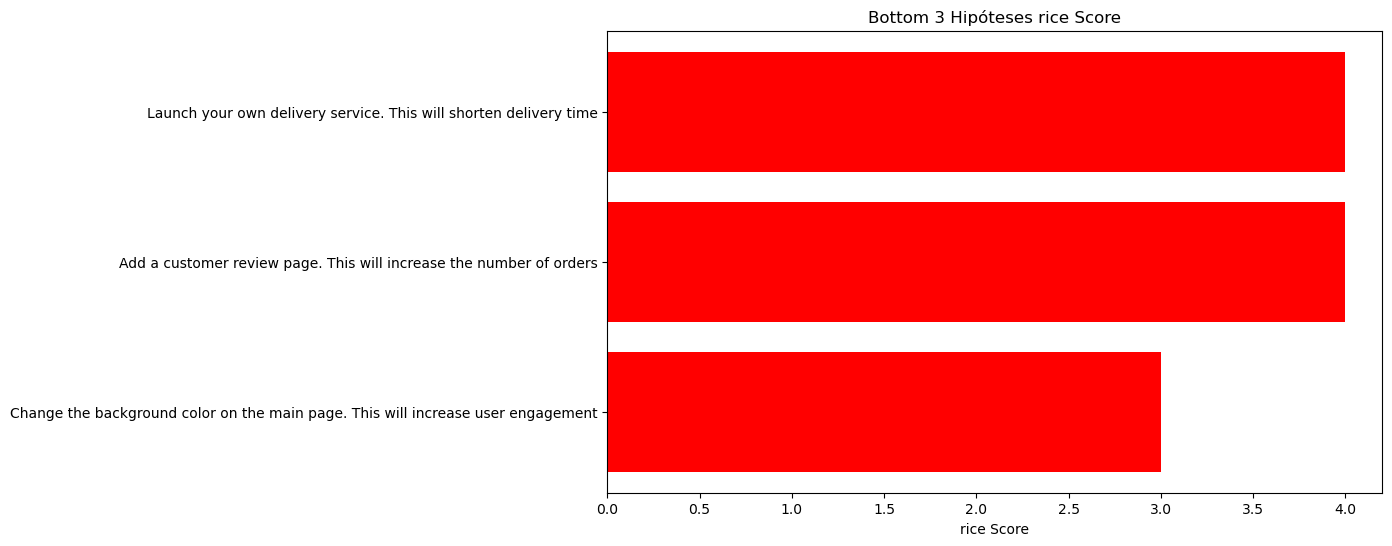

In [23]:
# Exibindo o gráfico de bottom 3 rice
plt.figure(figsize=(10, 6))
plt.barh(bottom_3_rice['hypothesis'], bottom_3_rice['rice'], color='red')
plt.xlabel('rice Score')
plt.title('Bottom 3 Hipóteses rice Score')
plt.gca().invert_yaxis()
plt.show()

# Mostre como a priorização de hipóteses muda quando você usa RICE em vez de ICE
OBS: A priorização de hipóteses muda quando utilizamos rice por conta do fator reach(alcance), que nós diz quantas pessoas são impactadas por esta hipótese e por conta disso as nossas hipóteses mudam significamente porque uma hipóteses que impacta mais usuários pode ter um efeito maior no resultado geral

# Dê uma explicação para as alterações.

TOP 1

"Add a subscription form to all the main pages" foi promovida do terceiro lugar no ICE para o primeiro no RICE, indicando que seu alcance(reach) é significativamente maior e por conta disto, seu impacto potencial aumenta consideravelmente quando o alcance(reach) é levado em conta.

TOP 2 

"Add product recommendation blocks to the store" subiu significativamente no ranking do ICE(5º lugar) para o RICE(2º lugar), indicando que seu alcance(reach) é maior do que outras hipóteses que estavam acima dela no ICE.


OBS: "Launch a promotion that gives users discounts" caiu do primeiro lugar no ICE para o quinto lugar no RICE, provavelmente porque no framework ice "Launch a promotion that gives users discounts" tenha um impacto e confiança altos porém seu alcance é menor comparado a outras hipóteses.

OBS: Podemos observar em df_hypotheses_sorted_ice e em df_hypotheses_sorted_rice que utilizando tail que hipóteses como "Change the background color on the main page" permanecem no final da lista em ambos os frameworks, indicando que tanto seu impacto quanto seu alcance são baixos.

OBS: Além de quão forte é a hipótese, temos que levar em consideração quantos usuários ela afetará.


# Parte 2. Análise de teste A/B 

## Faça um gráfico da receita acumulada por grupo. Tire conclusões e crie conjecturas.

In [24]:
# Construindo um vetor com valores de pares unívocos de grupos de datas
dates_group = df_orders[['date', 'group']].drop_duplicates()
# Obtendo dados diários cumulativos agregados sobre pedidos
orders_aggregated = dates_group.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# obtendo dados diários cumulativos agregados
dates_group.apply(
    lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# obtendo dados diários cumulativos agregados sobre visitantes
visitors_aggregated = dates_group.apply(
    lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
# juntando as duas tabelas em uma
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] # dando nome descritivo as colunas

cumulative_data # exibindo resultado

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


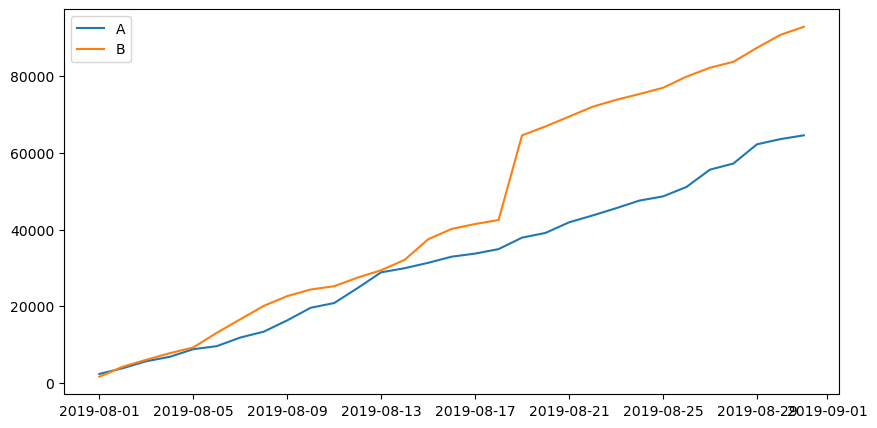

In [25]:
# Receita acumulada por grupo
# receita acumulada do grupo A
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'orders']]
# receita acumulada do grupo B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'orders']]
# Plotando a receita acumulada
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')
plt.legend()

Conjecturas:
- Pode ser que mudanças aplicadas ao grupo B foram mais eficazes em aumentar a receita do que as mudanças no grupo A.

- O grupo B pode ter um público alvo que corresponde melhor as alterações realizadas durante o teste.
---
# Conclusão:
O segmento B assumiu a liderança a partir do meio do teste e se manteve na frente.

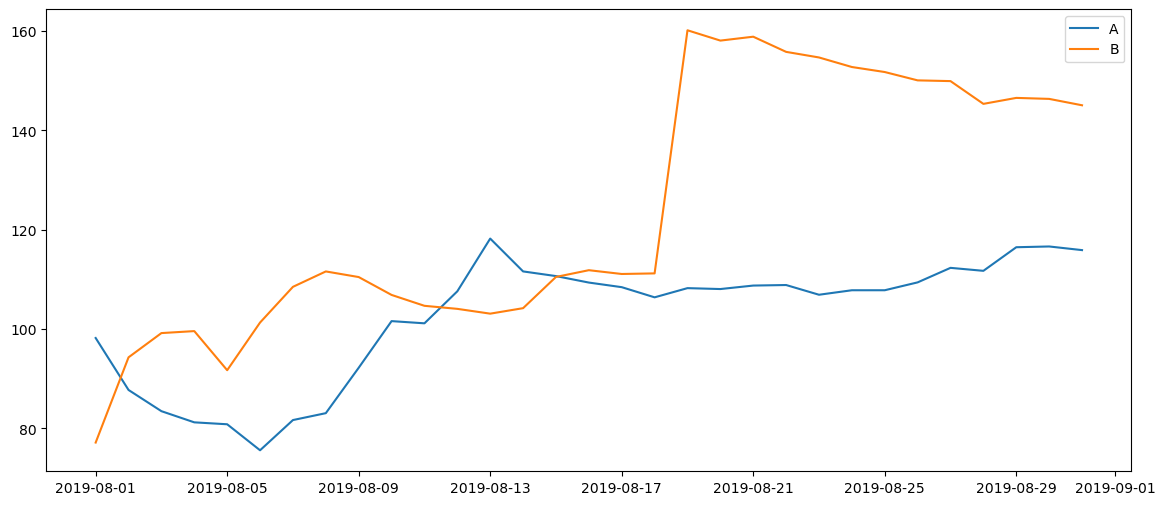

In [26]:
# Faça um gráfico do tamanho médio acumulado do pedido por grupo. Tire conclusões e crie conjecturas.
# Plotando gráfico do tamanho médio acumulado por grupo
plt.figure(figsize=(14, 6))
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'] / cumulative_revenueA['orders'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'] / cumulative_revenueB['orders'], label='B')
plt.legend()

Conjectura: 
- As estrategias de marketing para o grupo B podem ser mais eficaz resultando em um tamanho médio maior de pedidos.

- O grupo B pode ter um publico alvo com melhores condições financeiras, que influencia no tamanho medio dos pedidos.
---
# Conclusão: 
O valor cumulativo dos volumes médios de ambos seguimentos apresentam flutuações, podemos observar que na maior parte do tempo o tamanho médio dos pedidos acumulados tendem a ser maior para o segmento B na maior parte do tempo msd ainda é cedo para tomar alguma decisão baseada nisso. 


# Faça um gráfico da diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A.
# Faça conclusões e crie conjecturas.

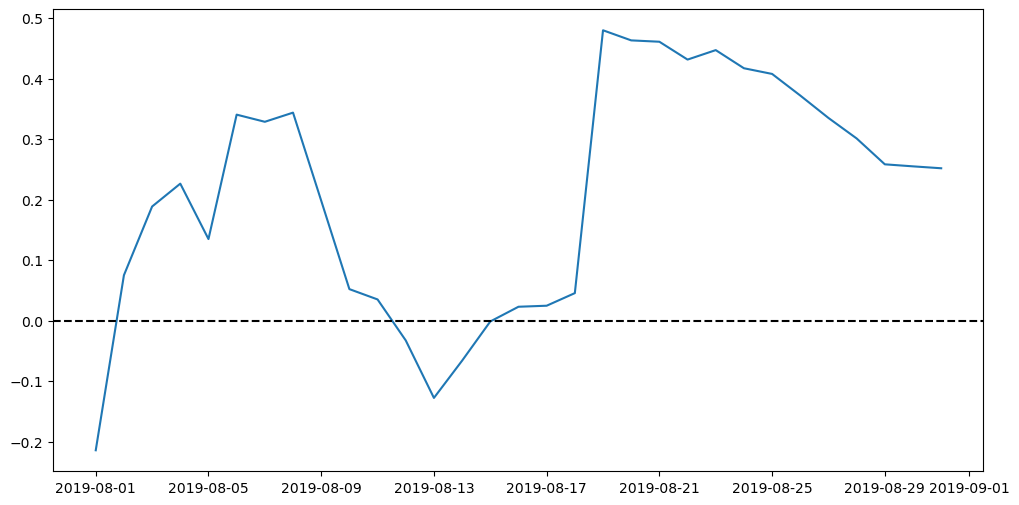

In [27]:
# Construindo um gráfico que mostra a diferença relativa do volume médio de compra.
merged_cumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB , left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--')

Conjecturas:
- Os consumidores do grupo B podem ter comprado em maiores quantidades ou podem ter optado por produtos mais caros comparado com o grupo A.

- Fatores externos como feriados, eventos especiais ou mudanças sazonais podem ter impactado as compras em momentos específicos.

- A diferença relativa pode ser resultado da estrategia de marketing que foi aplicada ao grupo B em comparação com a estrategia aplicada ao grupo A

- O grupo B pode ter recebido promoção que fizeram com que aumentasse o valor médio de pedidos.
---
# Conclusão:
Podemos observar alterações consideraveis e repentinas, talvez possam estar ligadas a pedidos muito maiores que o padrão.


# Calcule a taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia.
# Trace as taxas de conversão diárias dos dois grupos e descreva a diferença. Tire conclusões e crie conjecturas. 

In [28]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


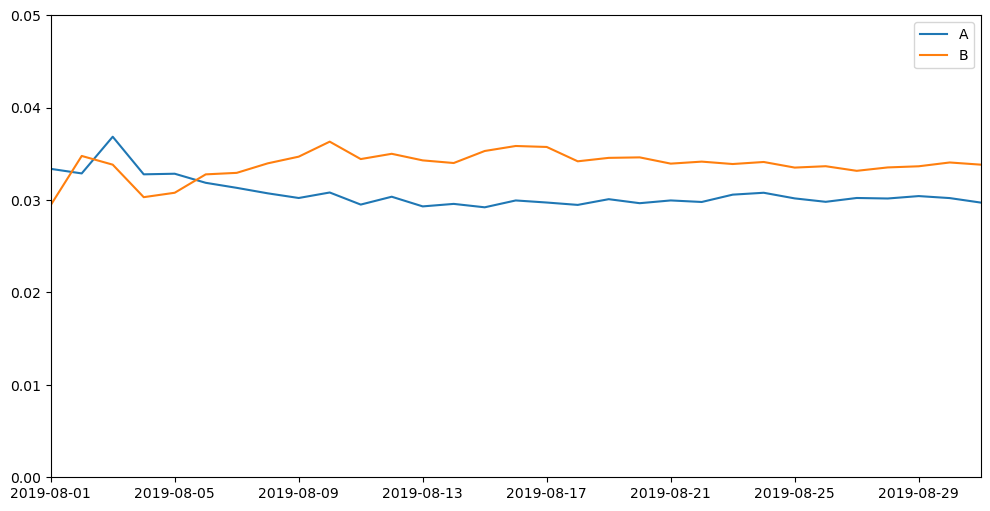

In [29]:
# Calculando a taxa de conversão
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
# Taxa de conversão do grupo A
cumulative_dataA = cumulative_data[cumulative_data['group']=='A']
# Taxa de conversão do grupo B
cumulative_dataB = cumulative_data[cumulative_data['group']=='B']
# Plotando gráfico da taxa de conversão por grupo
plt.figure(figsize=(12, 6))
plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='B')

plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])
plt.legend()

Conjecturas:

- Mudanças ou melhorias nos produtos ao grupo B podem ter contribuído para o aumento e estabilidade na taxa de conversão.

- De acordo com a taxa de conversão podemos formar a ideia de que conseguimos fidelizar mais clientes do grupo B
---
# Conclusão:
As estratégias iniciais do grupo A foram eficazes, mas ao longo do tempo as estratégias do grupo B mostraram-se ser mais eficazes e estaveis.

# Faça um gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A.
# Tire conclusões e crie conjecturas.

(18109.0, 18139.0, -0.5, 0.5)

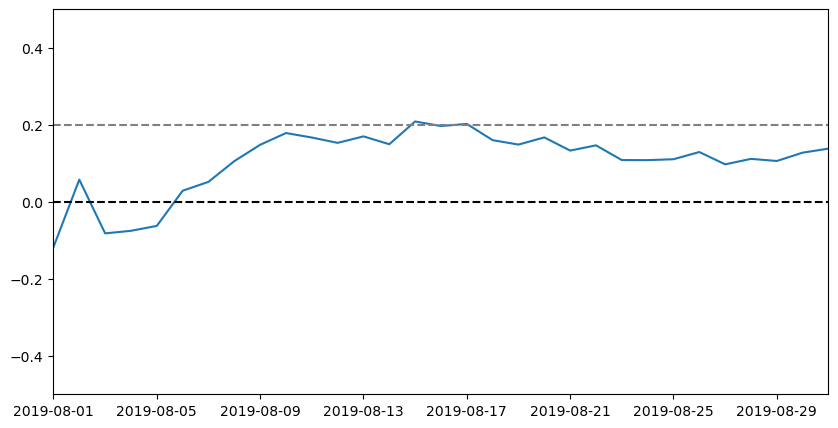

In [30]:
# Diferença relativa na conversão cumulativa ppara o grupo B em comparação com o A
merged_cumulative_conversions = cumulative_dataA[['date', 'conversion']].merge(cumulative_dataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
# Modificando especificações no gráfico
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])

Conjecturas:

-  A taxa de conversão ainda não é estável mas podemos observsar um crescimento gradual.

-  O grupo B teve um ganho constante e se estabilizou 15% acima do grupo A.
---
# Conclusão:
O grupo B inicialmente estava para trás mas rapidamente conseguiu assumir a liderança, a sua conversão está oscilando mas no final começou a crescer gradualmente mas ainda devemos observar se existe alguma anomalia, para saber se houve alguma alteração de modo geral.


In [31]:
# Calcule os percentis 95 e 99 para o número de pedidos por usuário. Defina o ponto em que um ponto de dados se torna uma anomalia.
orders_by_users = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users.columns = ['visitor_id', 'transaction_id']

print(orders_by_users.sort_values(by='transaction_id', ascending=False).head(10))

np.percentile(orders_by_users['transaction_id'], [95, 99])

      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


array([2., 4.])

OBS: Podemos definir o ponto em que os dados se torna anomalia os pedidos com valores superiores aos 95% dos pedidos por usuários

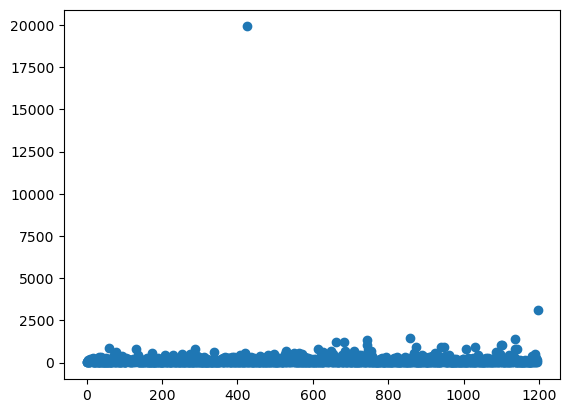

In [32]:
# Faça um gráfico de dispersão dos preços dos pedidos. Tire conclusões e crie conjecturas.
df_orders.sort_values(by='revenue', ascending=False).head(10)

x_values = pd.Series(range(0, len(df_orders['revenue'])))
plt.scatter(x_values, df_orders['revenue'])

Conclusão:
Observando o gráfico podemos notar que a maioria dos dados se concentra abaixo de $5.000
----
Conjectura:

-  O valor de $20.000 parece anormal

In [33]:
# Calcule os percentis 95 e 99 dos preços dos pedidos. Defina o ponto em que um ponto de dados se torna uma anomalia.
np.percentile(df_orders['revenue'], [95, 99])

array([435.54 , 900.904])

OBS: Podemos definir o ponto em que os dados se torna anomalia os pedidos com valores superiores aos 95% dos usuários.

In [34]:
# Encontre a significância estatística da diferença na conversão entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.

orders_by_userA = df_orders[df_orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_userA.columns = ['user_id', 'orders']

orders_by_userB = df_orders[df_orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_userB.columns = ['user_id', 'orders']

sampleA = pd.concat([orders_by_userA['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_by_userA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_userB['orders'], pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_by_userB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.017
0.138


Conjectura:

-   Se foi testado mudanças no site, ou uma campanha da equipe de marketing nós podemos dizer que as mudanças tiveram um impacto positivo na taxa de conversão do grupo B.

-  Podemos futuramente fazer entrevistas com usuários para saber qual mudança mais impactou no site para ele.
---
# Conclusão: 
Utilizando um p-valor abaixo de 0.05 é considerado estatisticamente significativo então podemos concluir que há uma diferença estatisticamente significativa na taxa de conversão entre os grupos A e B. O ganho de conversão relativo para o grupo B, comparado com o grupo A é de 13.8%. 


In [35]:
# Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos. Tire conclusões e crie conjecturas.
print('{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


Conjectura:

-   Precisamos verificar se houve diferentes promoções, descontos ou feriados que pudessem influenciar o tamanho médio do pedido. 
---
# Conclusão:
O p-valor é maior do que 0.05, então não há diferença estatisticamente significativa entre os volumes médios de pedidos. A diferença relativa é de 25,2%

In [36]:
# Criando os dados filtrados
# Criando a variavel para usuários que fizeram pedidos superior a 5
user_with_many_orders = pd.concat([orders_by_userA[orders_by_userA['orders'] > 5]['user_id'], orders_by_userB[orders_by_userB['orders'] > 4]['user_id']], axis = 0)
# Criando a variavel para usuários que gastaram mais de $5000
users_with_expensive_orders = df_orders[df_orders['revenue'] > 5000]['visitor_id']
# Juntando as tabelas
ab_normal_users = pd.concat([user_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values()

print(ab_normal_users.head(5))
print(ab_normal_users.shape)

425    1920142716
326    2378935119
340    2458001652
499    4256040402
dtype: int64
(4,)


In [37]:
ab_normal_users.head()

425    1920142716
326    2378935119
340    2458001652
499    4256040402
dtype: int64

# Encontre a significância estatística da diferença na conversão entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.

In [38]:
sampleA_filtered = pd.concat([orders_by_userA[np.logical_not(orders_by_userA['user_id'].isin(ab_normal_users))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_by_userA['orders'])),name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_by_userB[np.logical_not(orders_by_userB['user_id'].isin(ab_normal_users))]['orders'],pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_by_userB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print("{0:.3f}".format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

0.01778
0.143


Conjecturas:

-  Se foi testado mudanças no site, ou uma campanha da equipe de marketing nós podemos dizer que as mudanças tiveram um impacto positivo na taxa de conversão do grupo B.

-  Podemos futuramente fazer entrevistas com usuários para saber qual mudança mais impactou no site para ele.
---
# Conclusões:
Os resultados relativos à conversão quase não mudaram.


# Tome uma decisão com base nos resultados do teste. As decisões possíveis são:
### 1. Pare o teste, considere um dos grupos o líder. 
### 2. Pare o teste, conclua que não há diferença entre os grupos. 
### 3. Continue o teste.

In [39]:
# Encontre a significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados. Tire conclusões e crie conjecturas.
print('{0:.3f}'.format(stats.mannwhitneyu(
    df_orders[np.logical_and(
    df_orders['group']=='A',
    np.logical_not(df_orders['visitor_id'].isin(ab_normal_users)))]['revenue'],
    df_orders[np.logical_and(
    df_orders['group']=='B',
    np.logical_not(df_orders['visitor_id'].isin(ab_normal_users)))]['revenue'])[1]))

print('{0:.3}'.format(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitor_id'].isin(ab_normal_users)))]['revenue'].mean()/
    df_orders[np.logical_and(
    df_orders['group']=='A',
    np.logical_not(df_orders['visitor_id'].isin(ab_normal_users)))]['revenue'].mean() - 1 ))

0.922
-0.0361



Conjecturas: 
-  Possibilidade de um novo teste já que a diferença estatistica não foi significativa, pode ser interessante realizar um novo teste com uma amostra maior e verificar se há diferenças.

---
# Conclusão: 
Como p-valor é 0.922, não rejeitamos a hipótese nula de que não há diferença no tamanho médio do pedido entre os grupos A e B após a remoção dos usuários considerados(anormais), também conseguimos obter dados que nos mostraram que a diferença no tamanho médio do pedido seja de -3.61%, essa diferença não é estatisticamente significativa e é pequena. 


# Justificativa:
 Baseado na análise feita e nos dados obtidos podemos dizer que não há motivos para considerar algum dos grupos o líder ja que não há uma diferença significativa. Diante desta conclusão podemos tomar algumas decisões a seguir como, análise de (UX) para nós ajudar a descobrir quais os problemas que os usuários estão enfrentando com o site, se existe algum detalhe na interface que não está satisfazendo os usuários, podemos também fazer entrevistas com grupos focais para sabermos o que poderia melhor e assim iniciar novos testes baseado nas opiniões dos usuários e uma entrevista de especialistas para realizar um estudo mais aprofundado no campo que está sendo estudado e ajudar a rejeitar qualquer hipótese que já foi formulada ou testada

---
# Conclusão:
 Pare o teste, conclua que não há diferença entre os grupos.
